# Clustered Bar Charts

We can use **clustered bar charts** to show the relationship between two qualitative variables. 

However, to do this, we may need to process the second variable a little so it can be shown as a quantitative value along the y-axis. For example, you can count the frequency of the second variable. Also, you may also apply a color or texture encoding to distinguish the level of the second variable.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
# import data
fuel_econ = pd.read_csv('../1. Data Files/fuel-econ.csv')

In [3]:
# data info
fuel_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

In [4]:
# data head
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


To depict the relationship between two categorical variables, we can extend the univariate bar chart into a clustered bar chart. 

Like a standard bar chart, we still want to depict the count of data points in each group, but each group is now a combination of labels on two variables. So we want to organize the bars into an order that makes the plot easy to interpret.

In a clustered bar chart, bars are organized into clusters based on levels of the first variable, and then bars are ordered consistently across the second variable within each cluster. This is easiest to see with an example, using seaborn's countplot function. To take the plot from univariate to bivariate, we add the second variable to be plotted under the "hue" argument:

In [5]:
# two qualitative variables
# vehicle class
print('Vehicle class')
print(fuel_econ.VClass.unique())
print()
print('Vehicle Transmission')
print(fuel_econ.trans.unique())

Vehicle class
['Subcompact Cars' 'Compact Cars' 'Midsize Cars' 'Large Cars'
 'Minicompact Cars']

Vehicle Transmission
['Automatic (AM6)' 'Automatic (AM-S6)' 'Automatic (S6)' 'Automatic 8-spd'
 'Manual 6-spd' 'Automatic 6-spd' 'Automatic (S5)' 'Automatic 7-spd'
 'Automatic (AV-S6)' 'Automatic (S8)' 'Manual 7-spd' 'Automatic (AM-S7)'
 'Automatic (S7)' 'Automatic (variable gear ratios)' 'Manual 5-spd'
 'Automatic (AV-S8)' 'Automatic 4-spd' 'Automatic 5-spd' 'Automatic (AM7)'
 'Automatic (AV-S7)' 'Automatic 9-spd' 'Automatic (AM-S8)'
 'Automatic (A1)' 'Automatic (AM8)' 'Automatic (S9)' 'Automatic (S10)'
 'Automatic (AV-S10)']


In [6]:
# wrangle the trans column extracting the first name: Automatic or manual
fuel_econ['trans_type']=fuel_econ['trans'].apply(lambda x: x.split()[0])

In [7]:
fuel_econ.trans_type.unique()

array(['Automatic', 'Manual'], dtype=object)

In [8]:
# use groupby and size to get the number of cars in each combinition of the two variable levels as a pandas series. 
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts

VClass            trans_type
Compact Cars      Automatic     784
                  Manual        338
Large Cars        Automatic     605
                  Manual         20
Midsize Cars      Automatic     989
                  Manual        199
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
dtype: int64

In [9]:
# use reset index t0 convert the pandas series into a pandas dataframe
ct_counts = ct_counts.reset_index(name='count')
ct_counts

,VClass,trans_type,count
0,Compact Cars,Automatic,784
1,Compact Cars,Manual,338
2,Large Cars,Automatic,605
3,Large Cars,Manual,20
4,Midsize Cars,Automatic,989
5,Midsize Cars,Manual,199
6,Minicompact Cars,Automatic,188
7,Minicompact Cars,Manual,133
8,Subcompact Cars,Automatic,502
9,Subcompact Cars,Manual,171


In [10]:
# use pivot to rearrange the data so that I have vehicle class on rows, transmission type on columns and values in the cells
ct_counts = ct_counts.pivot(index='VClass', columns='trans_type', values='count')

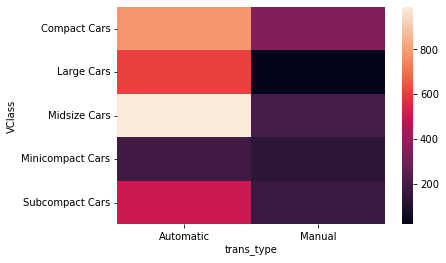

In [11]:
sb.heatmap(ct_counts);

It is hard to compare the counnts in transmission ratios from the colors alone. You can see that manual is less popular than automatic. But beyond that, it is hard to tell.

We can add annotations with counts to the cells which makes the representation more tabular in nature. The fmt parameter set to d ensures that all the counts are listed as decimal values. 

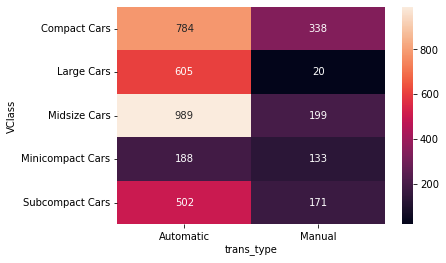

In [12]:
sb.heatmap(ct_counts, annot=True, fmt='d');

## Clustered barcharts

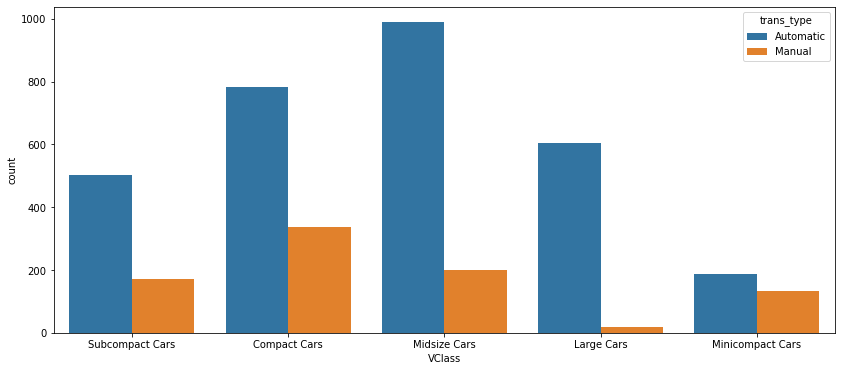

In [13]:
plt.figure(figsize=[14,6])
sb.countplot(data=fuel_econ, x='VClass', hue='trans_type');

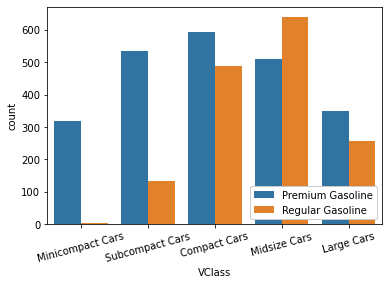

In [15]:
def categorical_solution_1():
  # data setup
  fuel_econ = pd.read_csv('../1. Data Files/fuel-econ.csv')
  sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
  pd_ver = pd.__version__.split(".")
  if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
    fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
  else: # pre-v0.21
    fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True,categories = sedan_classes)
  fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]
  # plotting
  ax = sb.countplot(data = fuel_econ_sub, x = 'VClass', hue = 'fuelType')
  ax.legend(loc = 4, framealpha = 1) # lower right, no transparency
  plt.xticks(rotation = 15)


categorical_solution_1()
